In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  path to your CSV
file_path = '/content/drive/MyDrive/healthcare dataset/healthcare_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

#basic information
print("Dataset Overview:")
print(df.info())

#descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

#missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())


In [2]:
# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())


First Few Rows of the Dataset:
                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    473

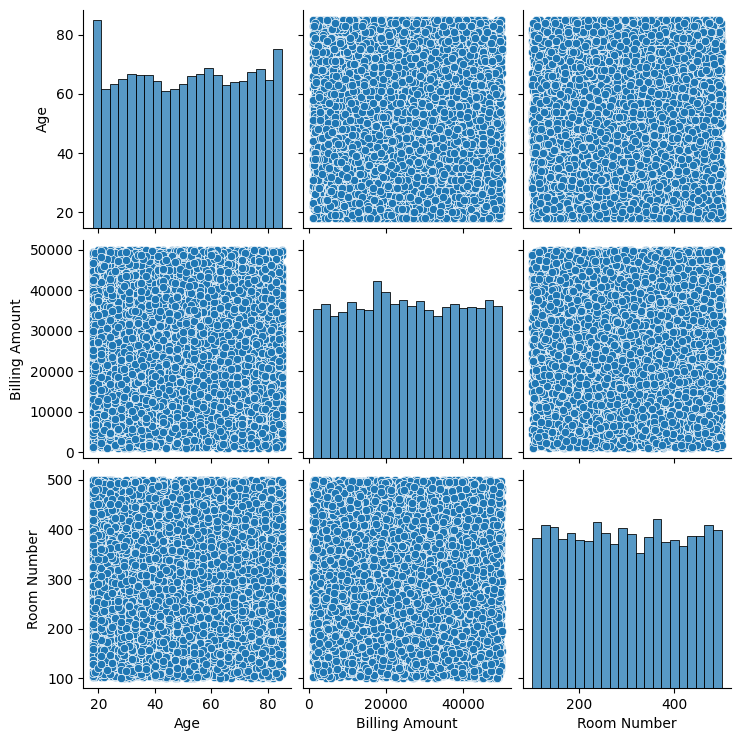

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_columns])
plt.show()


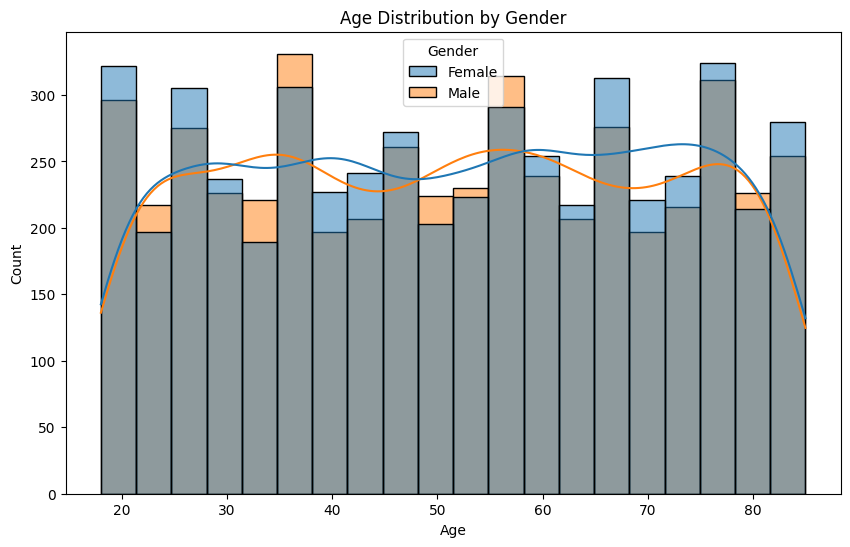

In [7]:
#age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', bins=20, kde=True)
plt.title('Age Distribution by Gender')
plt.show()

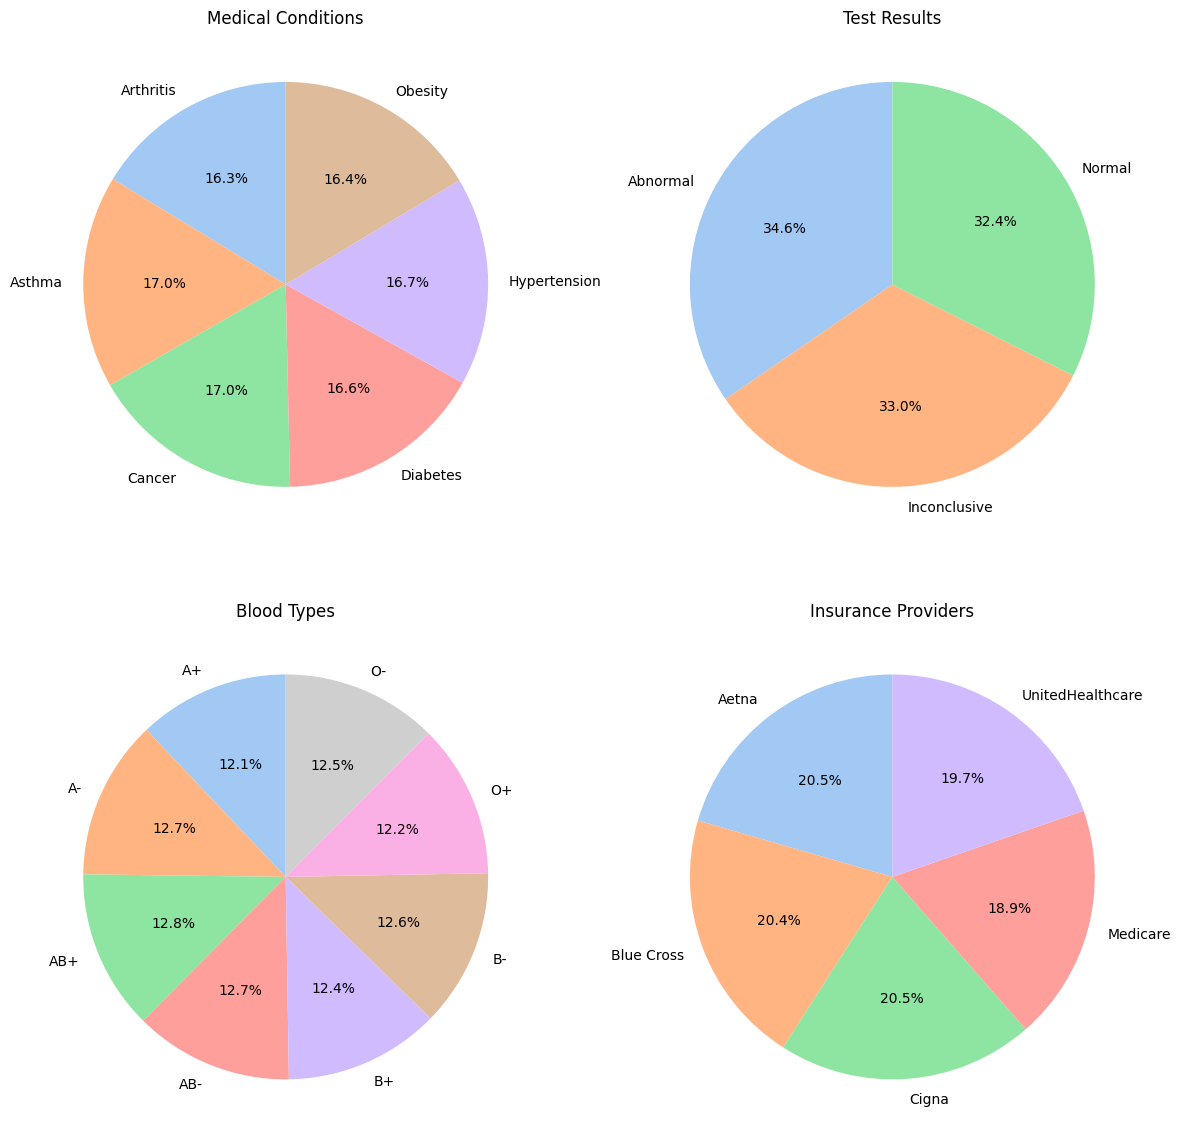

In [21]:
#total billing amounts for each medical condition
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum()

#total billing amounts for each test result
billing_by_test_result = df.groupby('Test Results')['Billing Amount'].sum()

#total billing amounts for each blood type
billing_by_blood_type = df.groupby('Blood Type')['Billing Amount'].sum()

#total billing amounts for each insurance provider
billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].sum()

# Create subplots with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Pie chart for medical conditions , test results , blood types, insurance providers
axes[0, 0].pie(billing_by_condition, labels=billing_by_condition.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Medical Conditions')

axes[0, 1].pie(billing_by_test_result, labels=billing_by_test_result.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 1].set_title('Test Results')

axes[1, 0].pie(billing_by_blood_type, labels=billing_by_blood_type.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1, 0].set_title('Blood Types')

axes[1, 1].pie(billing_by_provider, labels=billing_by_provider.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1, 1].set_title('Insurance Providers')


# Adjust layout
plt.tight_layout()
plt.show()

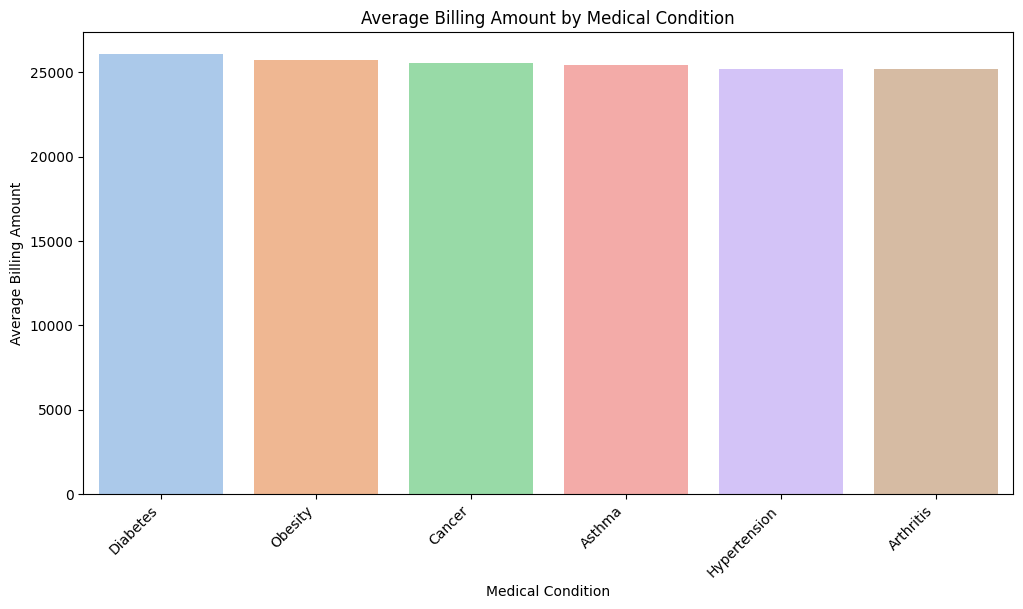

In [23]:
#average billing amount for each medical condition
average_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

# results
plt.figure(figsize=(12, 6))
sns.barplot(x=average_billing_by_condition.index, y=average_billing_by_condition, hue=average_billing_by_condition.index, palette='pastel', legend=False)
plt.title('Average Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

The rarest blood group is: A-


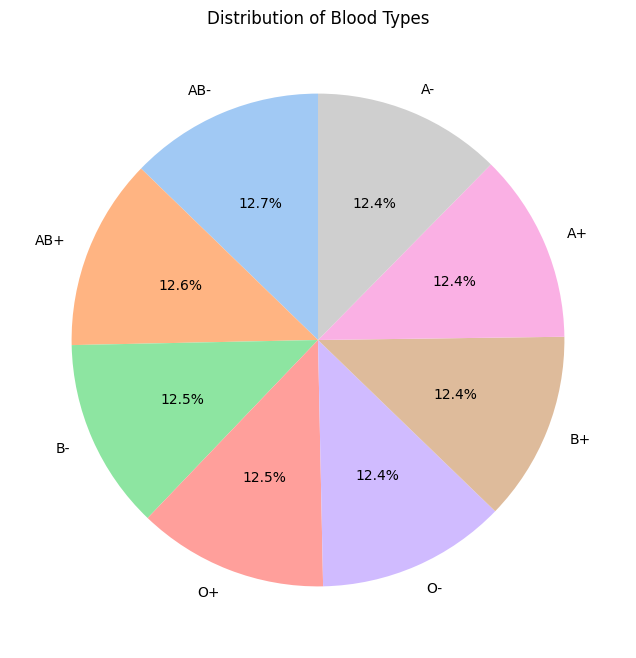

In [25]:
#each blood type
blood_type_counts = df['Blood Type'].value_counts()

#rarest blood group
rarest_blood_group = blood_type_counts.idxmin()

#result
print(f"The rarest blood group is: {rarest_blood_group}")

#pie chart for the distribution of blood types
plt.figure(figsize=(10, 8))
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Blood Types')
plt.show()

The hospital with the highest number of emergency admissions among the top 20 is: Smith PLC


<ipython-input-27-1079db4cd674>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_hospitals.index, y=top_20_hospitals, palette='pastel')


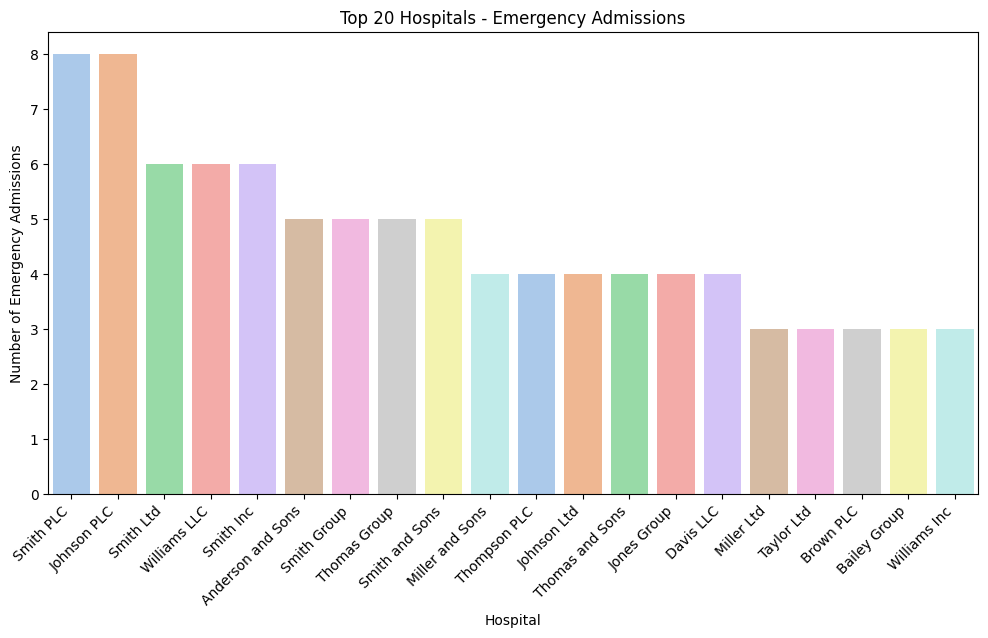

In [27]:
#rows with "Emergency" admission type
emergency_admissions = df[df['Admission Type'] == 'Emergency']

#each hospital for emergency admissions
emergency_counts_by_hospital = emergency_admissions['Hospital'].value_counts()

#top 20 hospitals
top_20_hospitals = emergency_counts_by_hospital.head(20)

#hospital with the highest number of emergency admissions
highest_emergency_hospital = top_20_hospitals.idxmax()

#the result
print(f"The hospital with the highest number of emergency admissions among the top 20 is: {highest_emergency_hospital}")

#distribution of emergency admissions by the top 20 hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_hospitals.index, y=top_20_hospitals, palette='pastel')
plt.title('Top 20 Hospitals - Emergency Admissions')
plt.xlabel('Hospital')
plt.ylabel('Number of Emergency Admissions')
plt.xticks(rotation=45, ha='right')
plt.show()

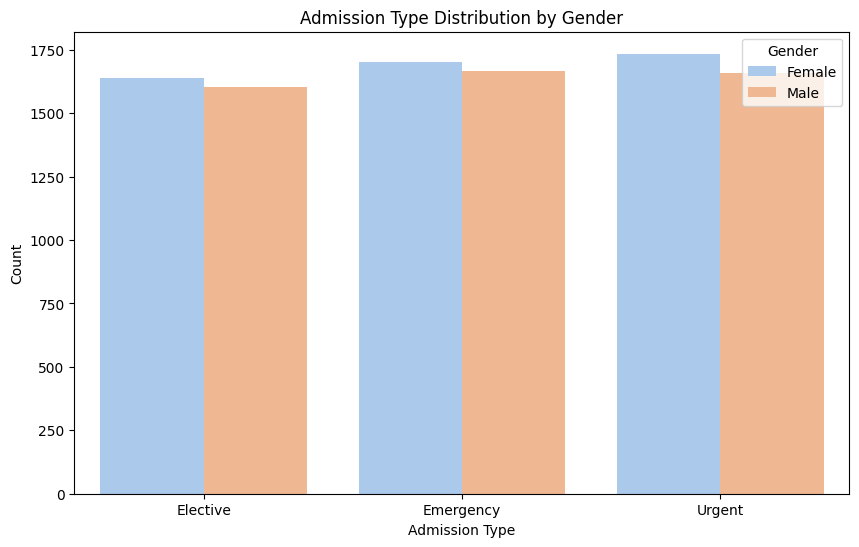

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Admission Type', hue='Gender', palette='pastel')
plt.title('Admission Type Distribution by Gender')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()


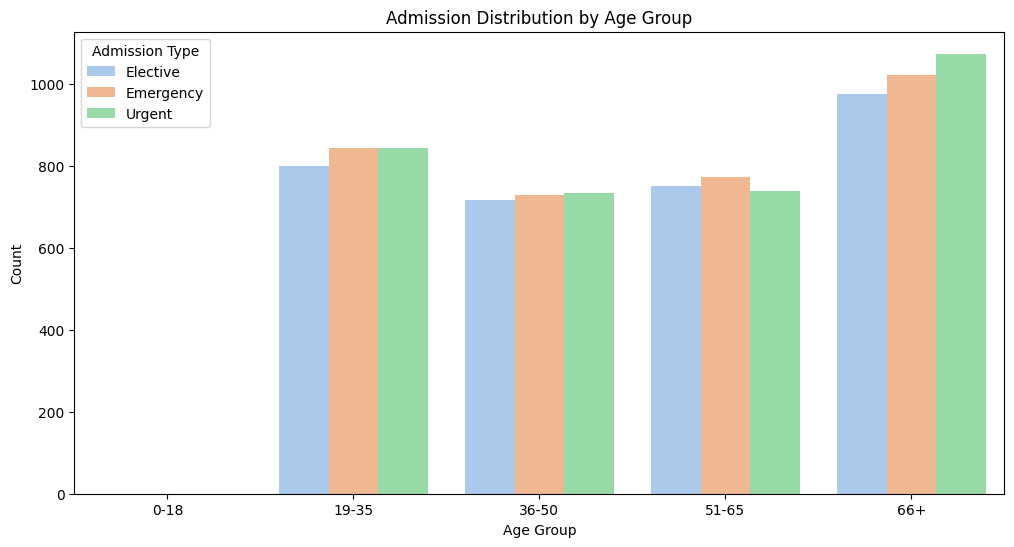

In [29]:
#define age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']

#new column for age group
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

#distribution of admissions by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Admission Type', palette='pastel')
plt.title('Admission Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

<ipython-input-30-aefd68399363>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_doctors.index, y=top_20_doctors, palette='pastel')


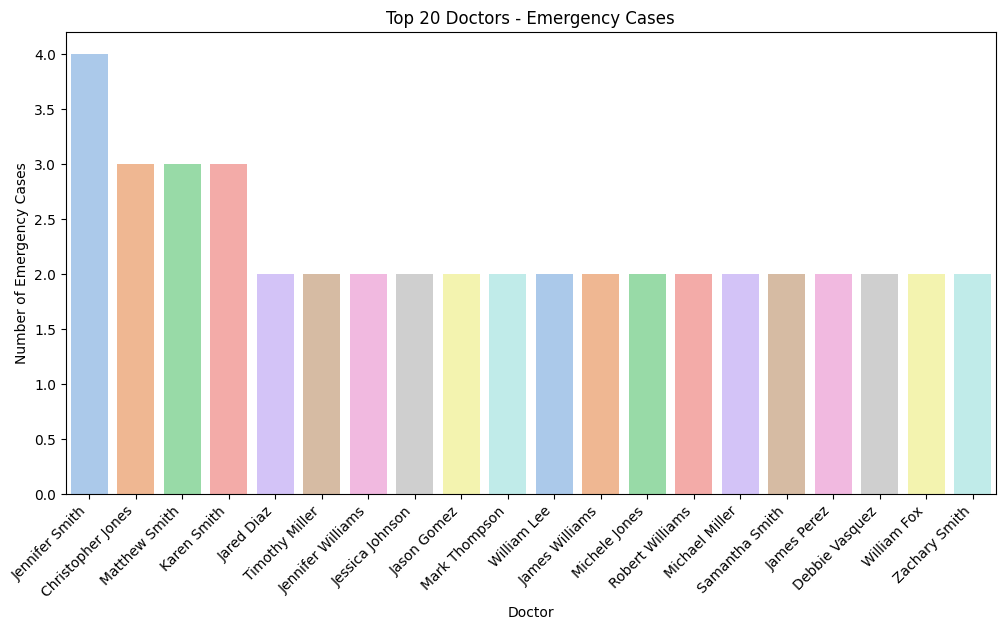

In [30]:
#rows with "Emergency" admission type
emergency_admissions = df[df['Admission Type'] == 'Emergency']

#occurrences of each doctor for emergency cases
emergency_counts_by_doctor = emergency_admissions['Doctor'].value_counts()

#the top 20 doctors
top_20_doctors = emergency_counts_by_doctor.head(20)

#distribution of emergency cases by the top 20 doctors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_doctors.index, y=top_20_doctors, palette='pastel')
plt.title('Top 20 Doctors - Emergency Cases')
plt.xlabel('Doctor')
plt.ylabel('Number of Emergency Cases')
plt.xticks(rotation=45, ha='right')
plt.show()